Defining the Question

Defining the metric for success

Understanding the context: Business Understanding

Data understanding

Experimental Design

Data Relevance

The relavance of our data will be answered by the following questions.

How accurate is the data at predicting whether a patient has hypothyroidism or not?

Was the dataset sufficient?

Was the data biased?

Is the data source a reliable source?

## Importing the libraries

In [73]:
from __future__ import division, print_function, unicode_literals
from io import open
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.optimizers import RMSprop
from keras.layers import Dense, Flatten, GlobalMaxPooling2D
from keras.callbacks import CSVLogger
import tensorflow as tf
from tensorflow import keras
import numpy as np 
import pandas as pd 
import cv2
from PIL import Image
import os


### loading the data

#### Previewing the data

In [74]:
#loading the train data
train = pd.read_csv('train.csv')
train.head(5)

,Width,Height,Roi.X1,Roi.Y1,Roi.X2,Roi.Y2,ClassId,Path
0,27,26,5,5,22,20,20,Train/20/00020_00000_00000.png
1,28,27,5,6,23,22,20,Train/20/00020_00000_00001.png
2,29,26,6,5,24,21,20,Train/20/00020_00000_00002.png
3,28,27,5,6,23,22,20,Train/20/00020_00000_00003.png
4,28,26,5,5,23,21,20,Train/20/00020_00000_00004.png


This is a classification task. Let us check the number of classes that we are aiming to classify the data into

In [75]:
train.ClassId.unique()

array([20,  0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15,
       16, 17, 18, 19, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42], dtype=int64)

The data has 43 unique classes

In [76]:
#loading the test data
test = pd.read_csv('test.csv')
test.head(5)

,Width,Height,Roi.X1,Roi.Y1,Roi.X2,Roi.Y2,ClassId,Path
0,53,54,6,5,48,49,16,Test/00000.png
1,42,45,5,5,36,40,1,Test/00001.png
2,48,52,6,6,43,47,38,Test/00002.png
3,27,29,5,5,22,24,33,Test/00003.png
4,60,57,5,5,55,52,11,Test/00004.png


In [77]:
pip list

Package                            Version  
---------------------------------- ---------
absl-py                            0.8.1    
alabaster                          0.7.12   
anaconda-client                    1.7.2    
anaconda-navigator                 1.9.7    
anaconda-project                   0.8.3    
asn1crypto                         1.0.1    
astor                              0.8.0    
astroid                            2.3.1    
astropy                            3.2.1    
atomicwrites                       1.3.0    
attrs                              19.2.0   
autopep8                           1.5      
Babel                              2.7.0    
backcall                           0.1.0    
backports.functools-lru-cache      1.6.1    
backports.os                       0.1.1    
backports.shutil-get-terminal-size 1.0.0    
backports.tempfile                 1.0      
backports.weakref                  1.0.post1
beautifulsoup4                     4.8.0    
bitarray  

### properties of the data

In [78]:
#checking the shape of the train dataset
train.shape

(39209, 8)

In [79]:
test.shape

(12630, 8)

In [80]:
train.ClassId.nunique()

43

In [81]:
test.ClassId.nunique()

43

Now, let us view the data distribution in the train dataset

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000245813D8408>]],
      dtype=object)

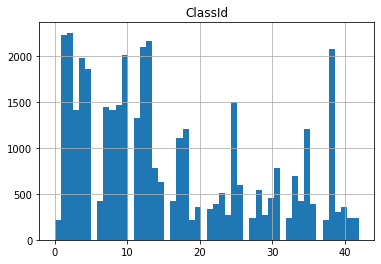

In [82]:
#histogram to show the distribution of a column
train.hist(column='ClassId', bins=50)

## Loading the images

The images are located in the same directory as the notebook. we need to specify the path to locate the images
so that we can read the image data

In [83]:
#specifying the path and printing the document names
print(os.listdir('../Image Classification Task Kaggle'))

['.ipynb_checkpoints', 'German Traffic Signs Image Classification.ipynb', 'Meta', 'Meta.csv', 'Test', 'Test.csv', 'Train', 'Train.csv']


Next, we put the images in an array in order to read and load them into our environment

In [84]:
# Reading the input images and putting them into a numpy array
#the data array stores the images without the labels and the labels array stores the image label
data=[]
labels=[]

#resizing the images to 30 by 30
height = 30
width = 30
#The channe
channels = 3
num_classes = 43
n_inputs = height * width*channels

for i in range(num_classes) :
    path = "../Image Classification Task Kaggle/Train/{0}/".format(i)
    print(path)
    Class=os.listdir(path)
    for a in Class:
        try:
            image=cv2.imread(path+a)
            image_from_array = Image.fromarray(image, 'RGB')
            size_image = image_from_array.resize((height, width))
            data.append(np.array(size_image))
            labels.append(i)
        except AttributeError:
            print(" ")
            
x_train=np.array(data)
x_train= x_train/255.0

from keras.utils.np_utils import to_categorical
y_train=np.array(labels)
y_train = to_categorical(y_train, num_classes) # Using one hote encoding

../Image Classification Task Kaggle/Train/0/
../Image Classification Task Kaggle/Train/1/
../Image Classification Task Kaggle/Train/2/
../Image Classification Task Kaggle/Train/3/
../Image Classification Task Kaggle/Train/4/
../Image Classification Task Kaggle/Train/5/
../Image Classification Task Kaggle/Train/6/
../Image Classification Task Kaggle/Train/7/
../Image Classification Task Kaggle/Train/8/
../Image Classification Task Kaggle/Train/9/
../Image Classification Task Kaggle/Train/10/
../Image Classification Task Kaggle/Train/11/
../Image Classification Task Kaggle/Train/12/
../Image Classification Task Kaggle/Train/13/
../Image Classification Task Kaggle/Train/14/
../Image Classification Task Kaggle/Train/15/
../Image Classification Task Kaggle/Train/16/
../Image Classification Task Kaggle/Train/17/
../Image Classification Task Kaggle/Train/18/
../Image Classification Task Kaggle/Train/19/
../Image Classification Task Kaggle/Train/20/
../Image Classification Task Kaggle/Train/21

In [85]:
from sklearn.utils import class_weight
class_weights = class_weight.compute_class_weight('balanced',
                                                 np.unique(labels),
                                                        labels)

print(np.unique(labels))
class_weights

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42]


array([4.34208195, 0.41073748, 0.40526098, 0.64669306, 0.46052384,
       0.49023506, 2.17104097, 0.63322028, 0.64669306, 0.62029742,
       0.45365035, 0.69078576, 0.43420819, 0.42214686, 1.16902206,
       1.44736065, 2.17104097, 0.82147496, 0.75986434, 4.34208195,
       2.53288114, 2.76314306, 2.33804413, 1.7879161 , 3.37717485,
       0.60789147, 1.51972868, 3.79932171, 1.68858742, 3.37717485,
       2.02630491, 1.16902206, 3.79932171, 1.3234212 , 2.17104097,
       0.75986434, 2.33804413, 4.34208195, 0.44050107, 3.03945736,
       2.53288114, 3.79932171, 3.79932171])

Now, the data is ready for training. we will use the train  data for training and validation,
after which, we will subject the model to test data to rate its accuracy.

In [86]:
# Split Data
from sklearn.model_selection import train_test_split
X_train,X_validation,Y_train,Y_validation = train_test_split(x_train,y_train,test_size = 0.3,random_state=0)

print("Train :", X_train.shape)
print("Validation :", X_validation.shape)
print("Train :", Y_train.shape)
print("Validation :", Y_validation.shape)



Train : (27446, 30, 30, 3)
Validation : (11763, 30, 30, 3)
Train : (27446, 43)
Validation : (11763, 43)


Before we proceed to modelling, let us preview some random images from the dataset

Train images


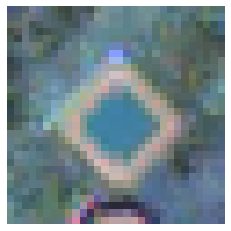

Size of this image is (30, 30, 3)
Class of the image is [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


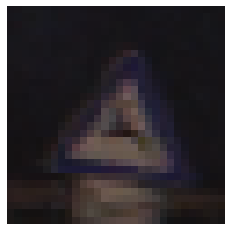

Size of this image is (30, 30, 3)
Class of the image is [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


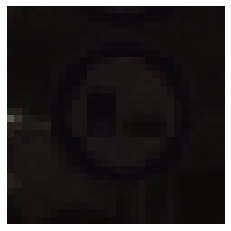

Size of this image is (30, 30, 3)
Class of the image is [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [87]:
import matplotlib.pyplot as plt
import random

def show_images(images, labels, amount):
    for i in range(amount):
        index = int(random.random() * len(images))
        plt.axis('off')
        plt.imshow(images[index])
        plt.show()       
        print("Size of this image is " + str(images[index].shape))
        print("Class of the image is " + str(labels[index]))

print("Train images")
show_images(X_train, Y_train, 3)

## Modelling

### Building the model

In [88]:
# Build Model and give the model summary
from tensorflow.keras.layers import Flatten, Conv2D, MaxPooling2D, Dropout, Dense
model = keras.models.Sequential()

model.add(Conv2D(32, kernel_size=(3,3), padding='same', activation='relu', input_shape=X_train.shape[1:]))
model.add(Conv2D(32, kernel_size=(3,3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))

model.add(Conv2D(64, kernel_size=(3, 3), padding='same', activation='relu'))
model.add(Conv2D(64, kernel_size=(3, 3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))

model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(rate=0.5))
model.add(Dense(num_classes, activation='softmax'))

model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 30, 30, 32)        896       
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 30, 30, 32)        9248      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 15, 15, 32)        0         
_________________________________________________________________
dropout_6 (Dropout)          (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 15, 15, 64)        18496     
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 15, 15, 64)        36928     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 7, 7, 64)         

### Compiling the model

In [89]:
#model compiling
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

### Training the Model

We will use 10 epochs(iterations to train the model)

In [ ]:
# Train Model
epochs = 10
history = model.fit(X_train, Y_train, validation_data=(X_validation, Y_validation), batch_size=32,
                    epochs=epochs,verbose=1,class_weight=class_weights)


Train on 27446 samples, validate on 11763 samples
Epoch 1/10
25440/27446 [==========================>...] - ETA: 8s - loss: 1.5313 - acc: 0.5579

### Evaluating the performance

In [ ]:
# ploting the accuracy and the loss
import matplotlib.pyplot as plt

plt.figure(0)
plt.plot(history.history['acc'], label='training accuracy')
plt.plot(history.history['val_acc'], label='val accuracy')
plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()

plt.figure(1)
plt.plot(history.history['loss'], label='training loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()

### Challenging the solution

#### Transfer Learning

In [ ]:
# Fixed for our Cats & Dogs classes
NUM_CLASSES = 43

# Fixed for Cats & Dogs color images
CHANNELS = 3

IMAGE_RESIZE = 128
RESNET50_POOLING_AVERAGE = 'avg'
DENSE_LAYER_ACTIVATION = 'softmax'
OBJECTIVE_FUNCTION = 'categorical_crossentropy'

# Common accuracy metric for all outputs, but can use different metrics for different output
LOSS_METRICS = ['accuracy']

# EARLY_STOP_PATIENCE must be < NUM_EPOCHS
NUM_EPOCHS = 50
EARLY_STOP_PATIENCE = 3

# These steps value should be proper FACTOR of no.-of-images in train & valid folders respectively
# Training images processed in each step would be no.-of-train-images / STEPS_PER_EPOCH_TRAINING
STEPS_PER_EPOCH_TRAINING = 10
STEPS_PER_EPOCH_VALIDATION = 10

# These steps value should be proper FACTOR of no.-of-images in train & valid folders respectively
# NOTE that these BATCH* are for Keras ImageDataGenerator batching to fill epoch step input
BATCH_SIZE_TRAINING = 100
BATCH_SIZE_VALIDATION = 100

# Using 1 to easily manage mapping between test_generator & prediction for submission preparation
BATCH_SIZE_TESTING = 1

In [ ]:
from tensorflow.python.keras.applications import ResNet50
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense

TL_model = ResNet50(weights='imagenet',
                      pooling = RESNET50_POOLING_AVERAGE,
                          include_top=False, 
                          input_shape=(128,128, 3))

In [ ]:
TL_model.summary()

In [ ]:
#Fitting the pretrained model
history_TL = model.fit(X_train, Y_train, validation_data=(X_validation, Y_validation), batch_size=32,
                    epochs=epochs,verbose=1)

In [ ]:
# ploting the accuracy and the loss
import matplotlib.pyplot as plt

plt.figure(0)
plt.plot(history_TL.history['acc'], label='training accuracy')
plt.plot(history_TL.history['val_acc'], label='val accuracy')
plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()

plt.figure(1)
plt.plot(history_TL.history['loss'], label='training loss')
plt.plot(history_TL.history['val_loss'], label='val loss')
plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()

### Predicting using new data

In [ ]:
# Predicting with Test data 
y_test=pd.read_csv("../Image Classification Task Kaggle/Test.csv")
labels=y_test['Path'].as_matrix()
y_test=y_test['ClassId'].values

data=[]

for f in labels:
    image=cv2.imread('../Image Classification Task Kaggle/Test/'+f.replace('Test/', ''))
    image_from_array = Image.fromarray(image, 'RGB')
    size_image = image_from_array.resize((height, width))
    data.append(np.array(size_image))

X_test=np.array(data)
X_test = X_test.astype('float32')/255  
pred = model.predict_classes(X_test)

### Checking the Accuracy

#### AUC score

In [ ]:
from sklearn import metrics
fpr, tpr, thresholds = metrics.roc_curve(y_test, pred, pos_label=2)
metrics.auc(fpr, tpr)

#### Classification report

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test , pred))

#### Accuracy score

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, pred)

#### Confusion Matrix

In [ ]:
import itertools
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=75) 
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
            plt.text(j, i, cm[i, j],
            horizontalalignment="center",
            color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

class_names = range(43)
cm = confusion_matrix(pred,y_test)

plt.figure(2)
plt.figure(figsize=(15,15))
plot_confusion_matrix(cm, classes=class_names, title='Confusion matrix')